# Tabular Feasibility

For Wednesday June 25 you should be well on your way to assess feasibility of your project. This notebook will be submitted Friday June 27. You can find example codes in [Kaggle Lecture](https://github.com/UTA-DataScience/DATA3402.Spring.2025/blob/main/Lectures/Lecture.19/Lecture.19.ipynb) from Data 3402. You can find the recordings of a walk-through in our class Team (`Data 4380- 2024/Lecture Recordings`), Lectures 8 and 10-12.


## Define Project

**Project Link:**
[Students Performance Dataset](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset)

 **Description of the Challenge:**
This project aims to predict students’ grade class (A–F) based on demographic, academic, and extracurricular information. The objective is to identify patterns and factors that most influence academic performance so that educators and parents can intervene early for at-risk students.

 **Description of the Data:**
The dataset contains approximately 2,400 rows with 15 features per student. These features include demographic data (age, gender, ethnicity), parental background, study habits (study time, absences, tutoring), extracurricular activities (sports, music, volunteering), and GPA. The target variable is GradeClass, representing student performance on a scale from 0=A to 4=F.

 **Machine Learning Task:**
This is a supervised learning problem formulated as a multi-class classification task, where we predict the GradeClass based on the student’s profile.

## Data Loading and Initial Look

First lets establish that the data is in good shape:

* Load the data.
* Count the number of rows (data points) and features.
* Any missing values?
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values?
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
    * If you have a lot of features, summarize (e.g. 100 categorical and 500 numerical features).
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data
df = pd.read_csv("Student_performance_data _.csv")

# 1. Shape
rows, cols = df.shape
print(f"Dataset contains {rows} rows and {cols} columns.\n")


Dataset contains 2392 rows and 15 columns.



In [3]:
df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [4]:
# 2. Missing values
missing_vals = df.isnull().sum()

# 3. Feature types and value ranges
feature_info = []
for col in df.columns:
    dtype = df[col].dtype
    num_missing = missing_vals[col]
    if np.issubdtype(dtype, np.number):
        val_range = f"{df[col].min()} to {df[col].max()}"
        feature_type = "Numerical"
    else:
        val_range = ", ".join(map(str, df[col].unique()))
        feature_type = "Categorical"
    feature_info.append([col, feature_type, val_range, num_missing])

# Print feature summary table
print(" Feature Summary:")
print(tabulate(feature_info, headers=["Feature","Type","Range/Values","Missing Values"], tablefmt="pretty"))

 Feature Summary:
+-------------------+-----------+----------------------------------------+----------------+
|      Feature      |   Type    |              Range/Values              | Missing Values |
+-------------------+-----------+----------------------------------------+----------------+
|     StudentID     | Numerical |              1001 to 3392              |       0        |
|        Age        | Numerical |                15 to 18                |       0        |
|      Gender       | Numerical |                 0 to 1                 |       0        |
|     Ethnicity     | Numerical |                 0 to 3                 |       0        |
| ParentalEducation | Numerical |                 0 to 4                 |       0        |
|  StudyTimeWeekly  | Numerical | 0.001056538645936 to 19.97809399526153 |       0        |
|     Absences      | Numerical |                0 to 29                 |       0        |
|     Tutoring      | Numerical |                 0 to 1      

In [5]:
# 4. Outlier detection using IQR
outlier_info = []
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    num_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    if num_outliers > 0:
        outlier_info.append([col, num_outliers, f"{lower:.2f}", f"{upper:.2f}"])

if outlier_info:
    print("\n Outlier Summary:")
    print(tabulate(outlier_info, headers=["Feature","Num Outliers","Lower Bound","Upper Bound"], tablefmt="pretty"))
else:
    print("\nNo significant outliers detected!")



 Outlier Summary:
+-------------------+--------------+-------------+-------------+
|      Feature      | Num Outliers | Lower Bound | Upper Bound |
+-------------------+--------------+-------------+-------------+
| ParentalEducation |     120      |    -0.50    |    3.50     |
|       Music       |     471      |    0.00     |    0.00     |
|   Volunteering    |     376      |    0.00     |    0.00     |
+-------------------+--------------+-------------+-------------+


In [6]:
# 5. Target class distribution
class_counts = df['GradeClass'].value_counts().sort_index()
class_percents = df['GradeClass'].value_counts(normalize=True).sort_index() * 100
class_table = []
for cls, cnt, perc in zip(class_counts.index, class_counts.values, class_percents.values):
    class_table.append([cls, cnt, f"{perc:.2f}%"])

print("\n Target Class Distribution:")
print(tabulate(class_table, headers=["GradeClass","Count","Percentage"], tablefmt="pretty"))


 Target Class Distribution:
+------------+-------+------------+
| GradeClass | Count | Percentage |
+------------+-------+------------+
|    0.0     |  107  |   4.47%    |
|    1.0     |  269  |   11.25%   |
|    2.0     |  391  |   16.35%   |
|    3.0     |  414  |   17.31%   |
|    4.0     | 1211  |   50.63%   |
+------------+-------+------------+


/tmp/ipython-input-7-3513864929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GradeClass', palette='viridis')


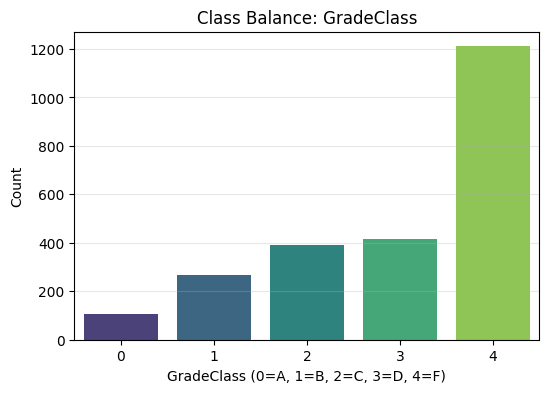

In [7]:
# 6. # Convert target to integer (No need to encode numerical already)

df['GradeClass'] = df['GradeClass'].astype(int)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='GradeClass', palette='viridis')
plt.title('Class Balance: GradeClass')
plt.xlabel('GradeClass (0=A, 1=B, 2=C, 3=D, 4=F)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()


## Data Visualization

Next perform your first visualizaion:

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression:
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

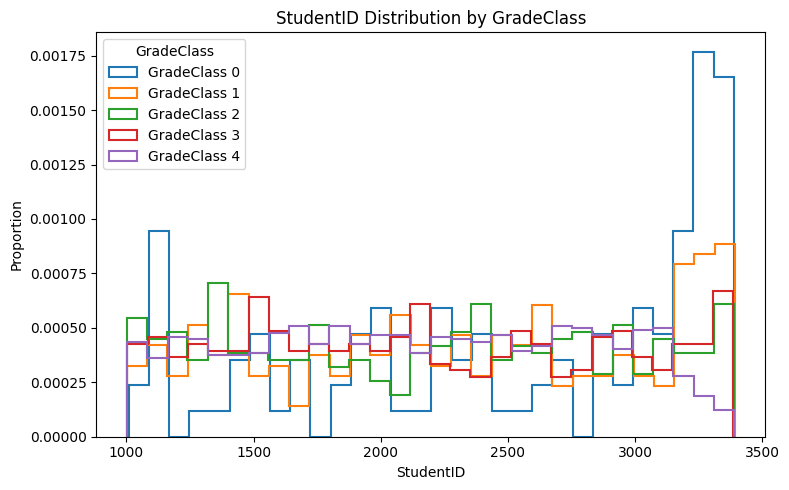

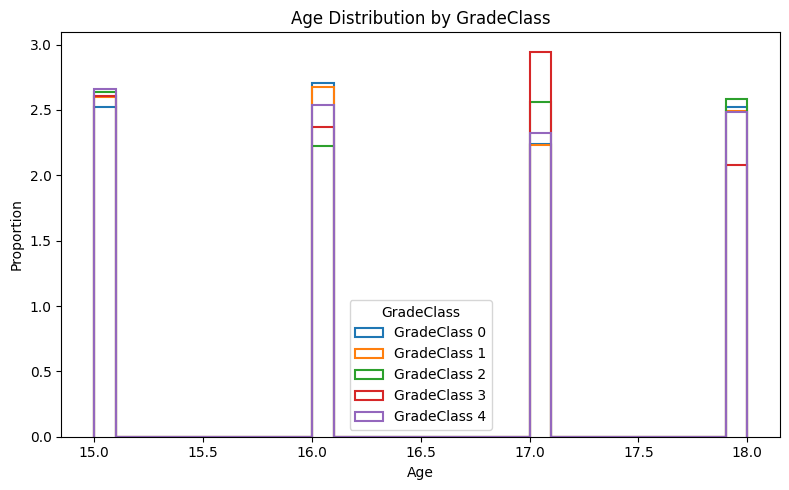

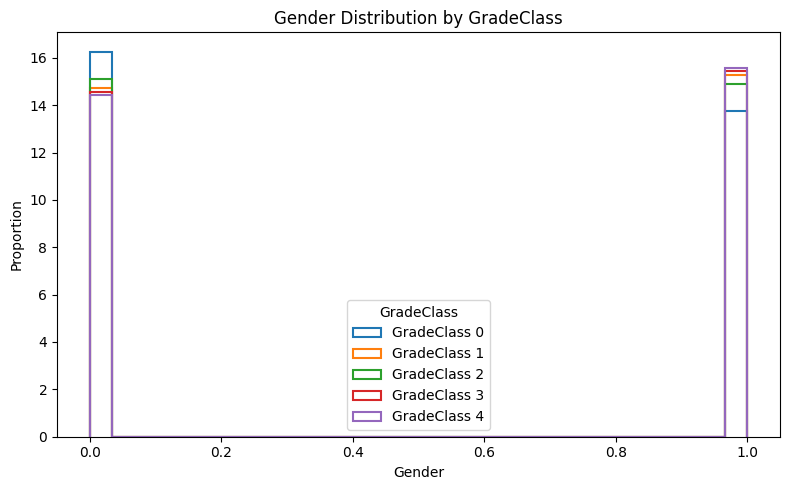

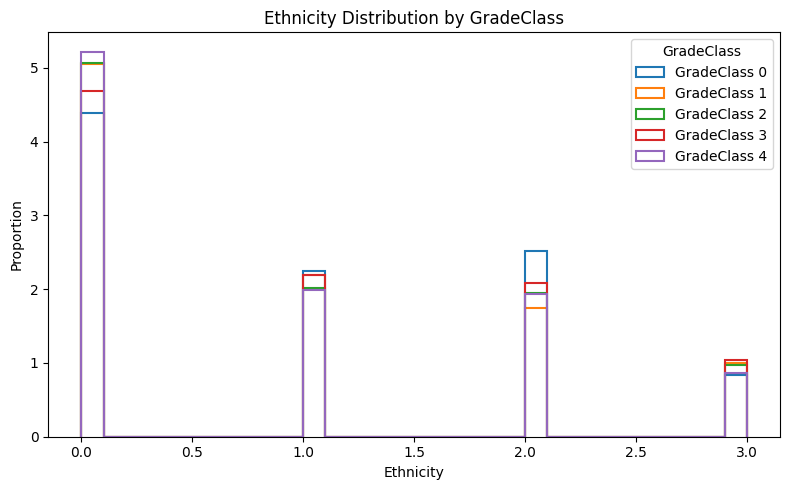

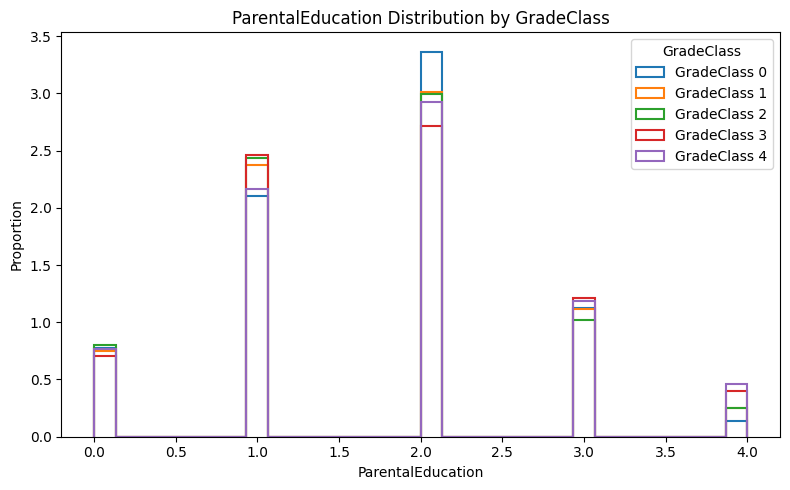

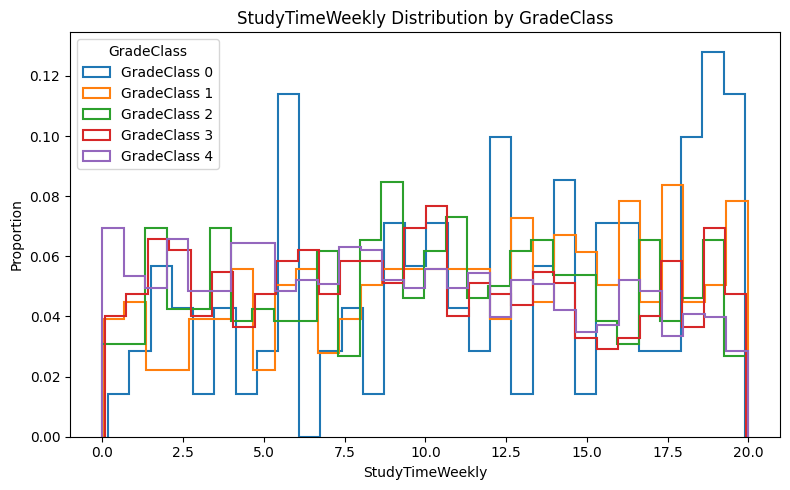

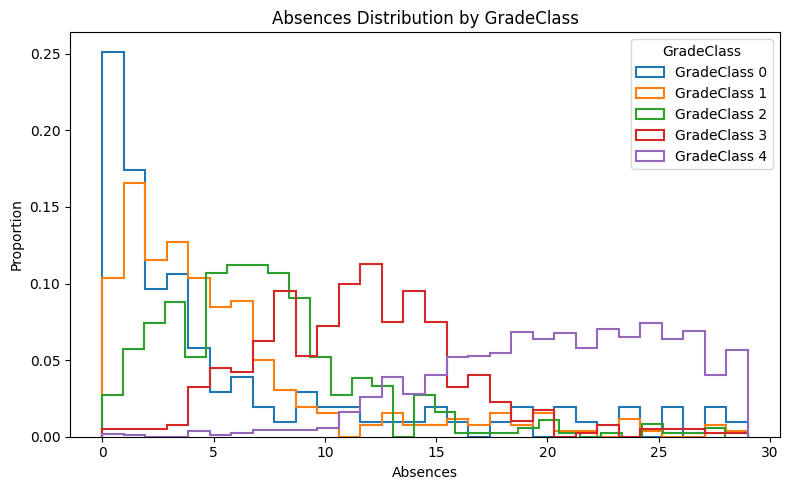

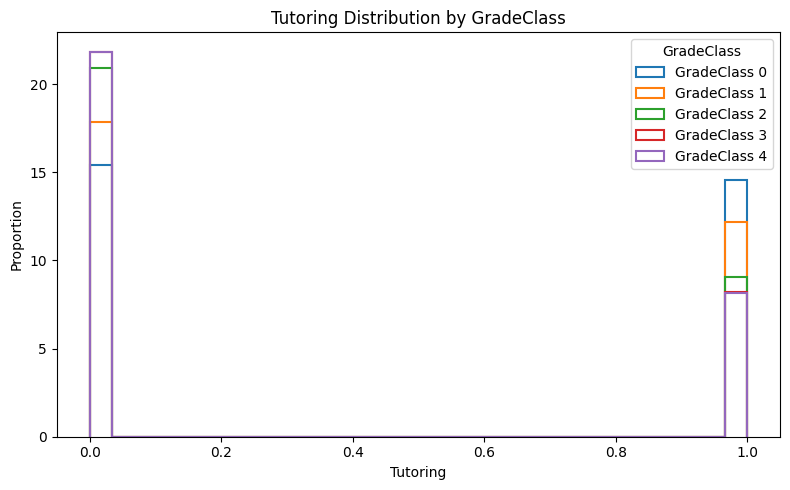

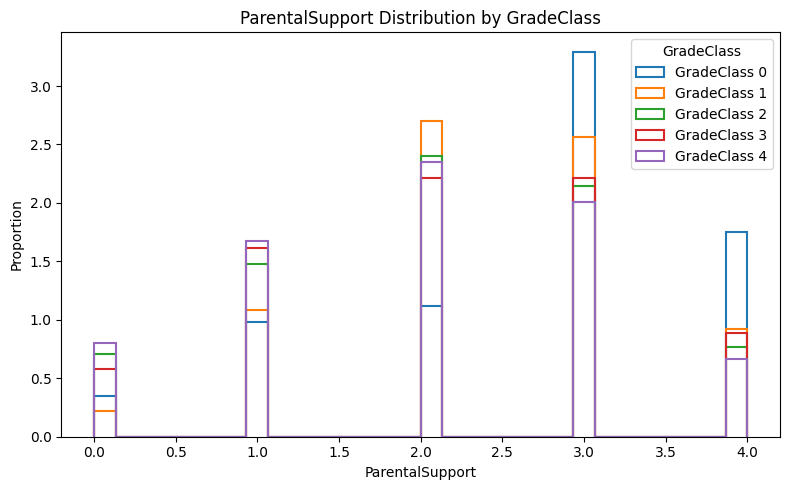

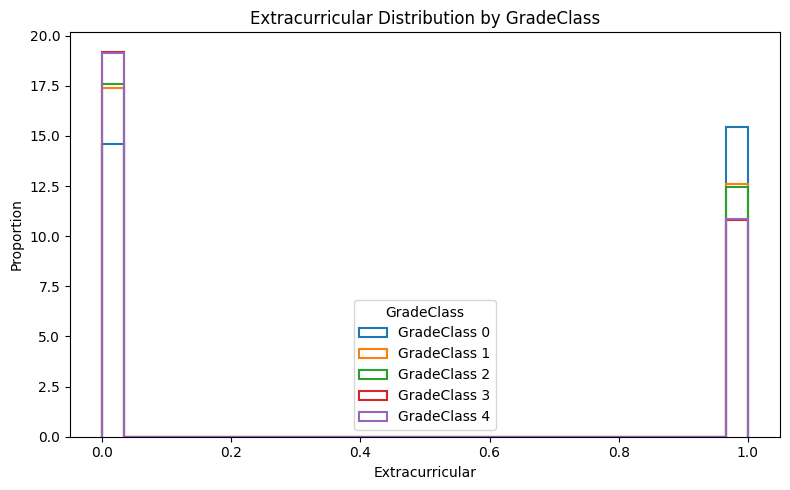

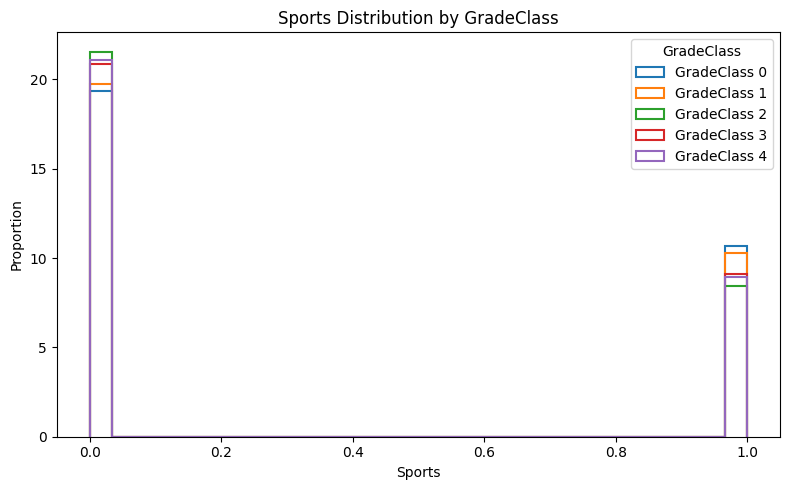

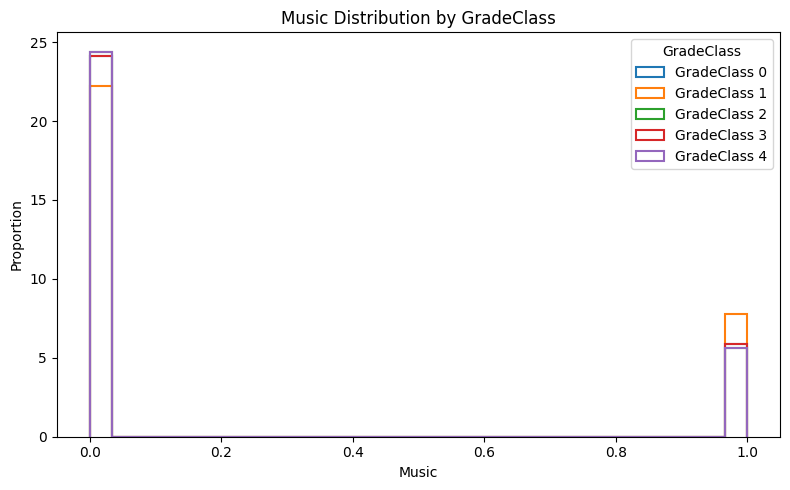

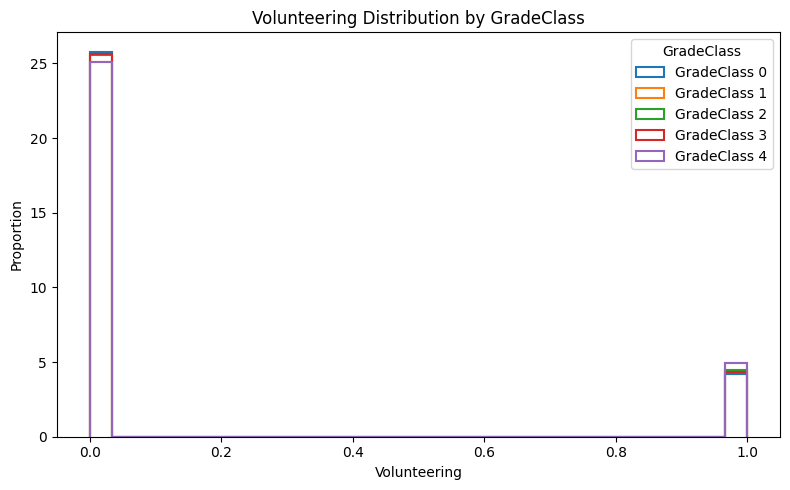

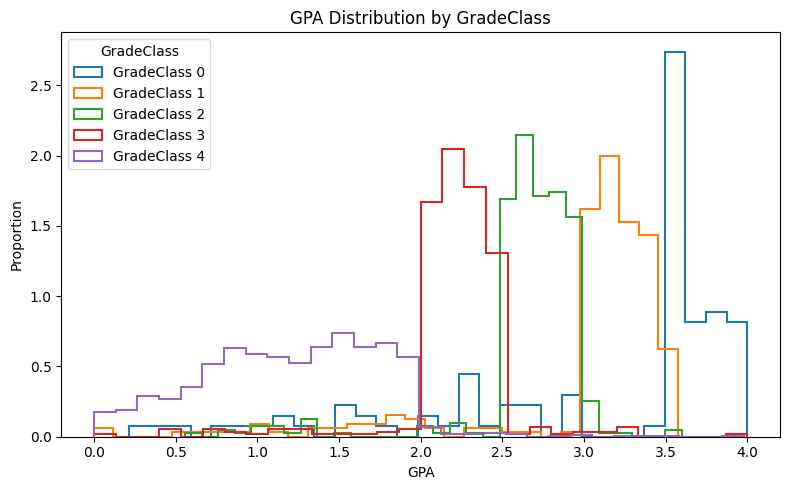

In [8]:
import matplotlib.pyplot as plt

# Get list of all numeric columns except target
numerical_cols = df.select_dtypes(include=['number']).columns.drop('GradeClass')

# Plot normalized outlined histograms for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    for grade_class in sorted(df['GradeClass'].unique()):
        df[df['GradeClass'] == grade_class][col].plot(
            kind='hist',
            bins=30,
            density=True,      # normalize the histogram
            histtype='step',   # draw as outlined step
            linewidth=1.5,
            label=f'GradeClass {int(grade_class)}'
        )
    plt.legend(title='GradeClass')
    plt.title(f'{col} Distribution by GradeClass')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


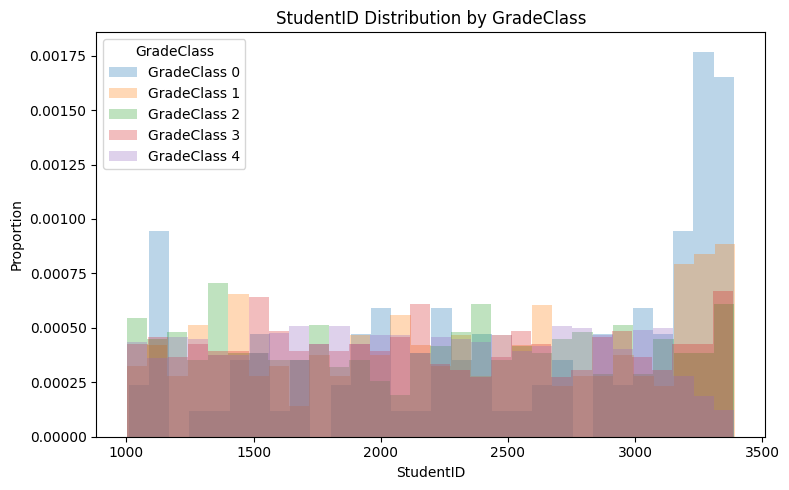

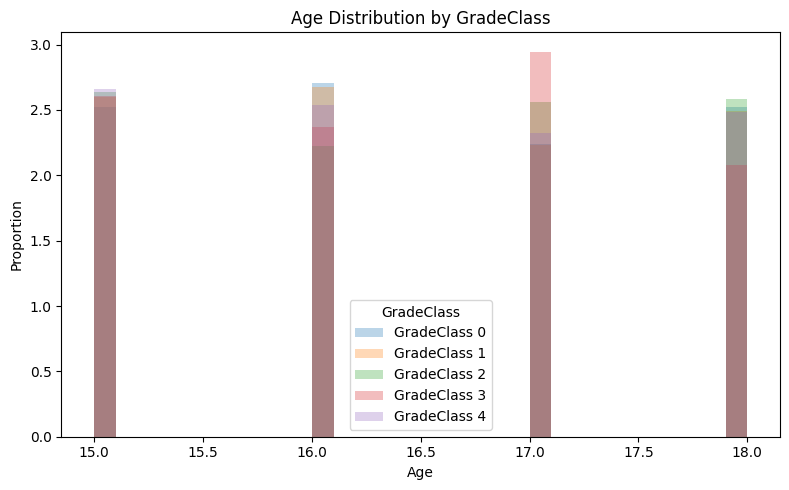

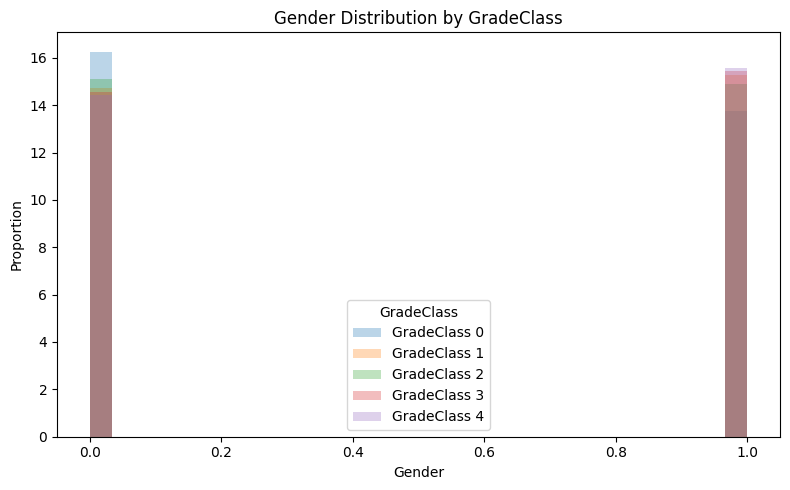

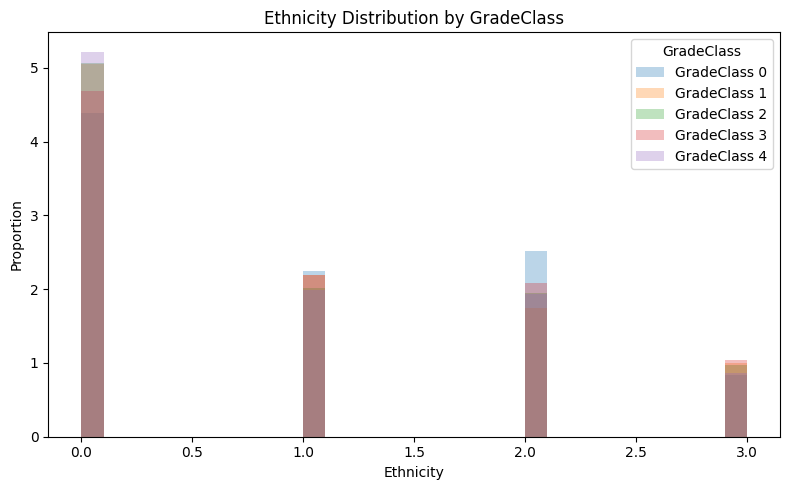

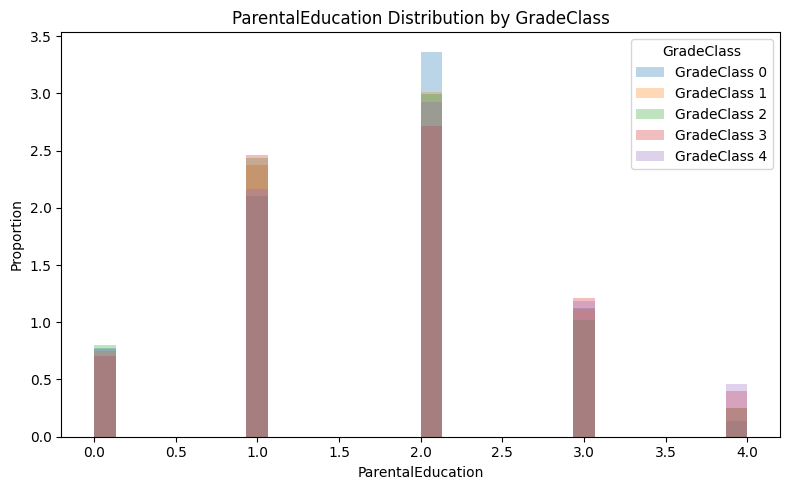

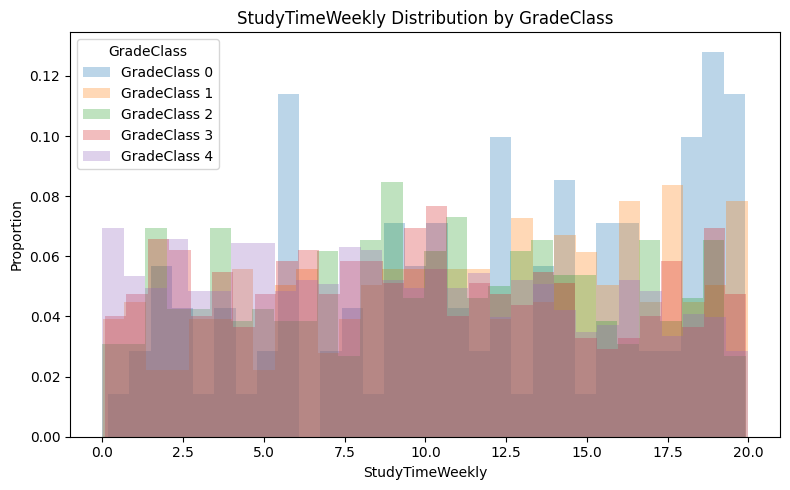

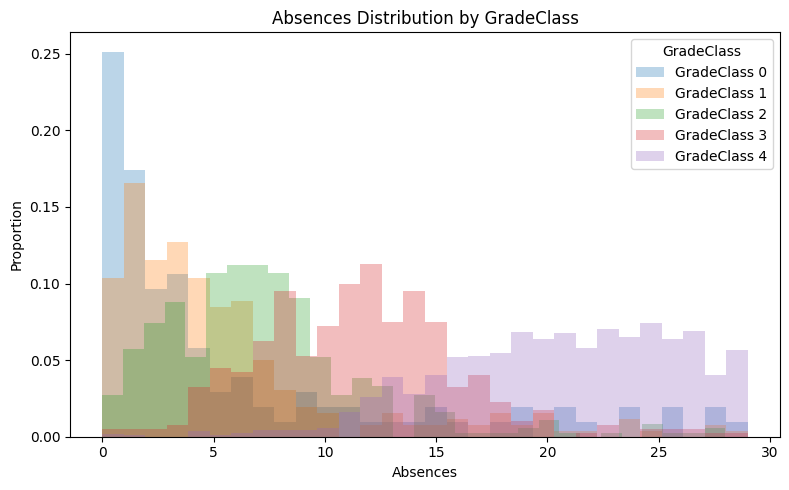

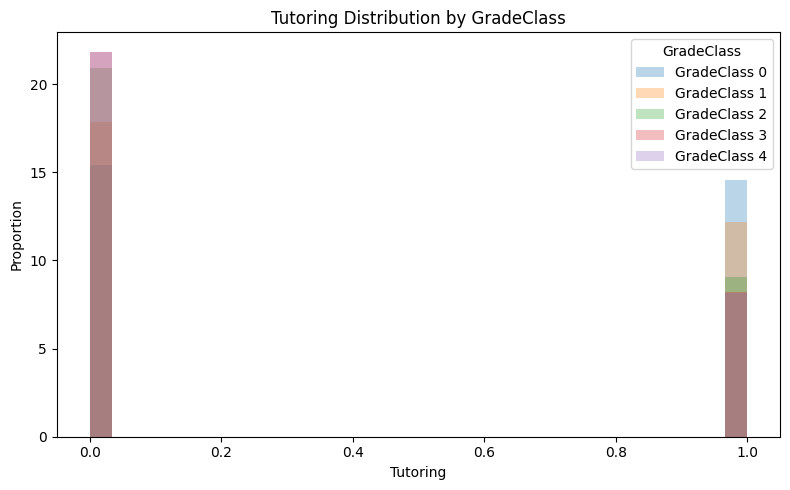

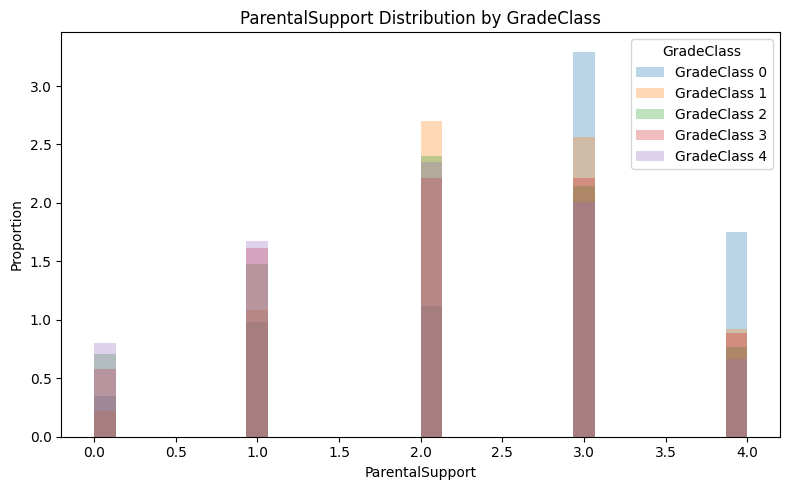

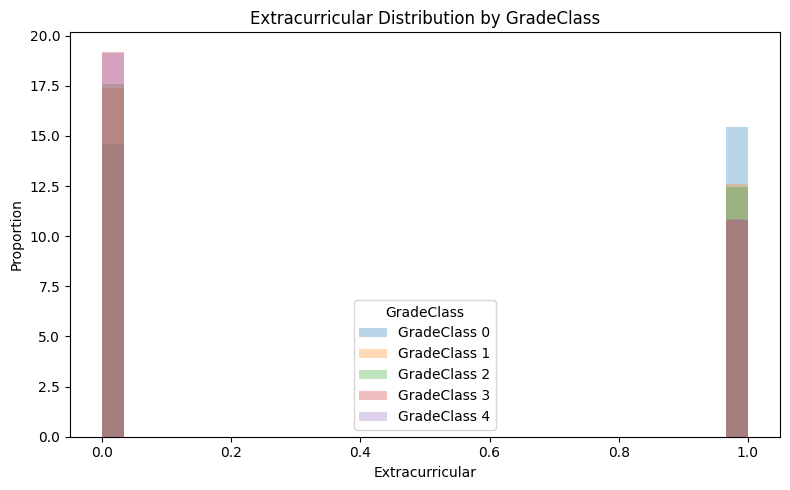

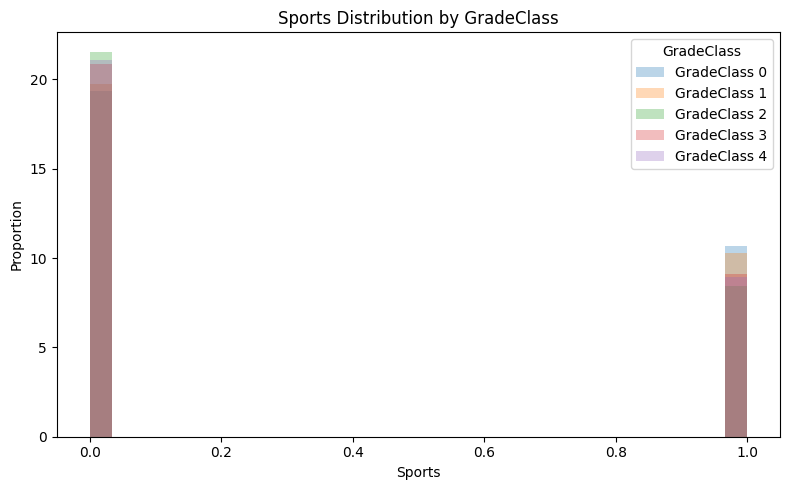

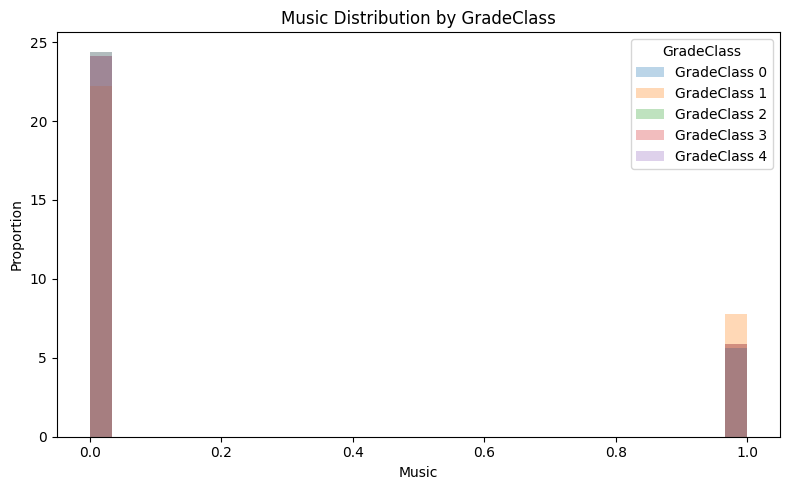

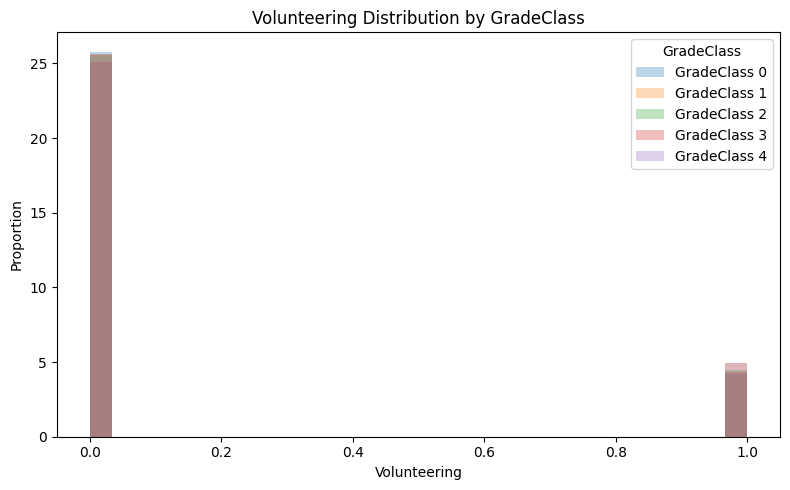

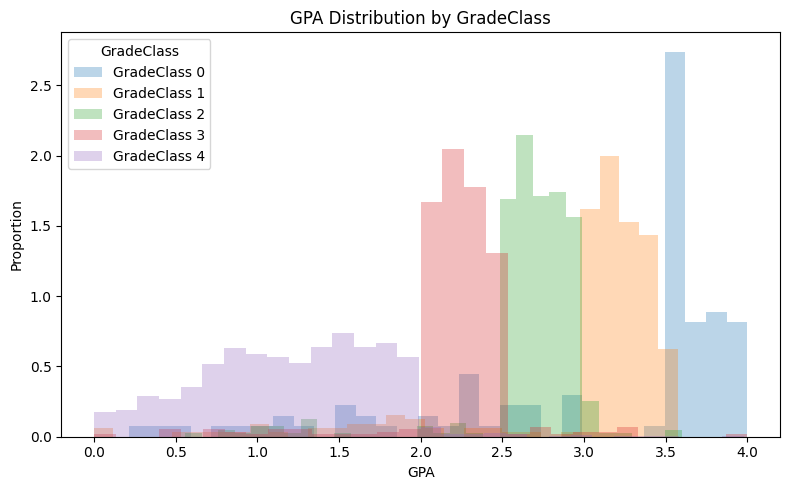

In [9]:
import matplotlib.pyplot as plt

# Get list of all numeric columns except target
numerical_cols = df.select_dtypes(include=['number']).columns.drop('GradeClass')

# Plot normalized filled histograms for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    for grade_class in sorted(df['GradeClass'].unique()):
        df[df['GradeClass'] == grade_class][col].plot(
            kind='hist',
            bins=30,
            density=True,         # normalize the histogram
            histtype='stepfilled', # filled style
            alpha=0.3,             # light opacity for softer color
            label=f'GradeClass {int(grade_class)}'
        )
    plt.legend(title='GradeClass')
    plt.title(f'{col} Distribution by GradeClass')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


## Data Cleaning and Preperation for Machine Learning

Based on what you find above, prepare the data for ML.

* Perform any data cleaning. Be clear what are you doing, for what feature.
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

Missing:
 0
Duplicates: 0


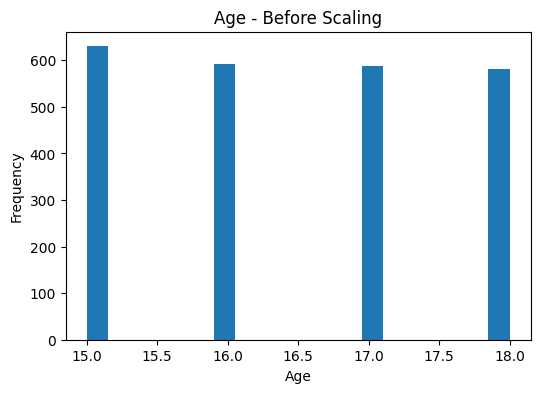

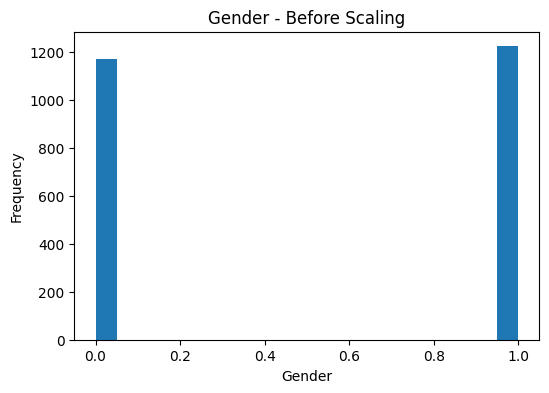

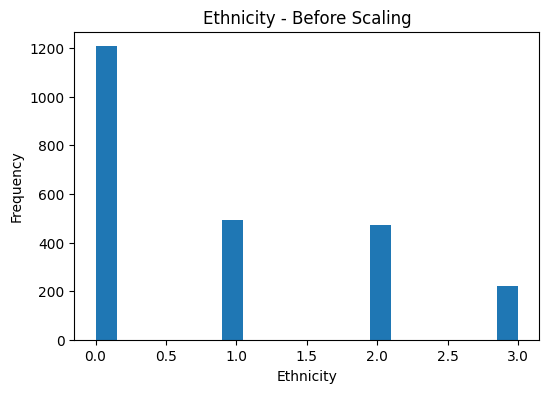

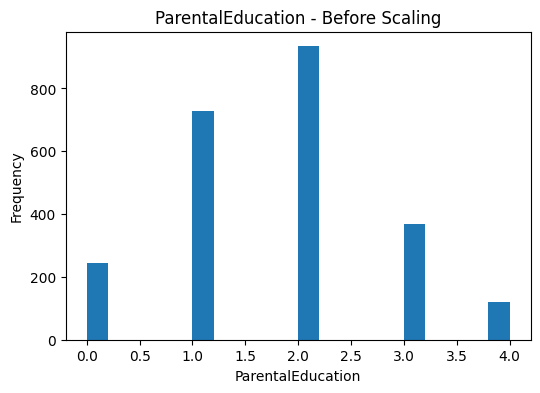

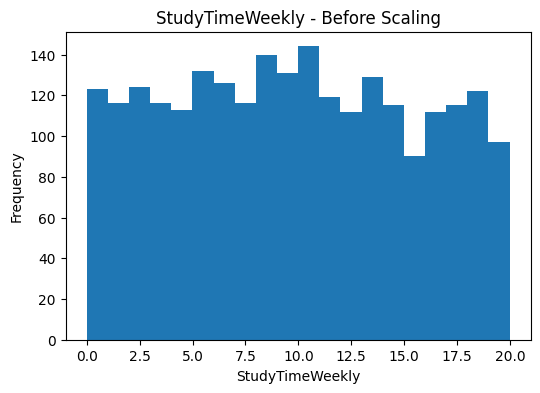

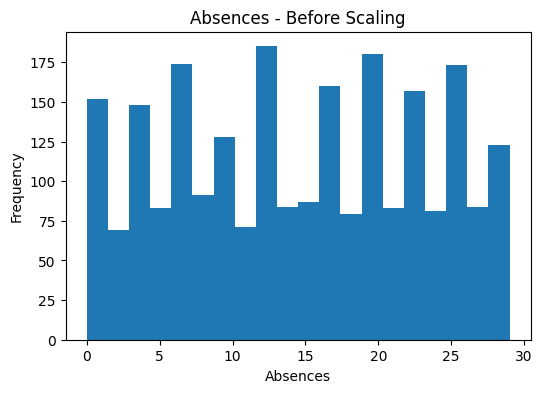

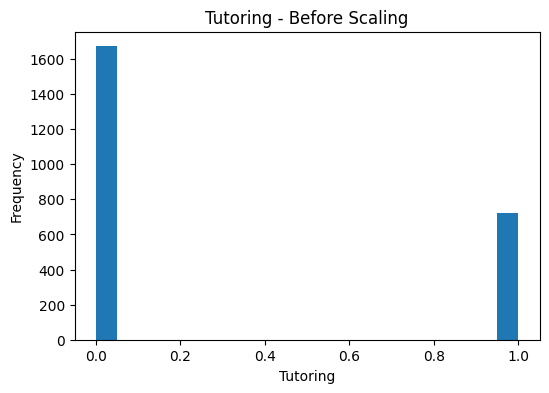

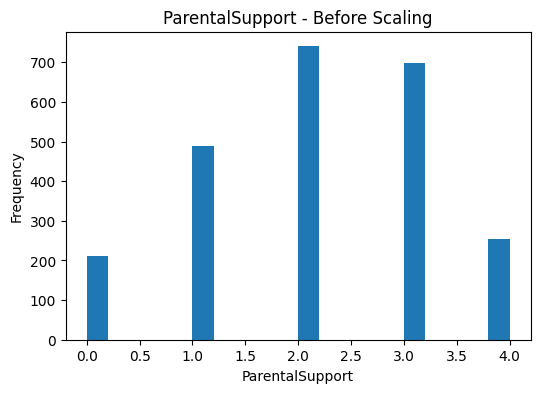

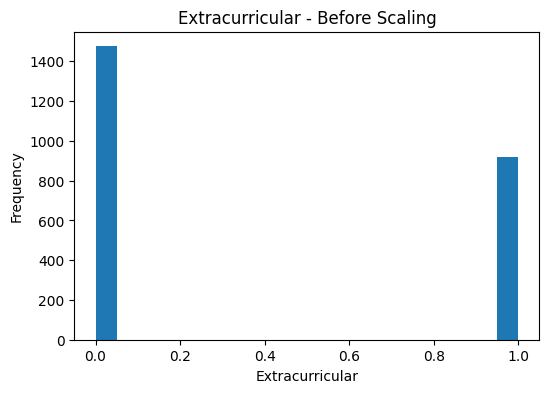

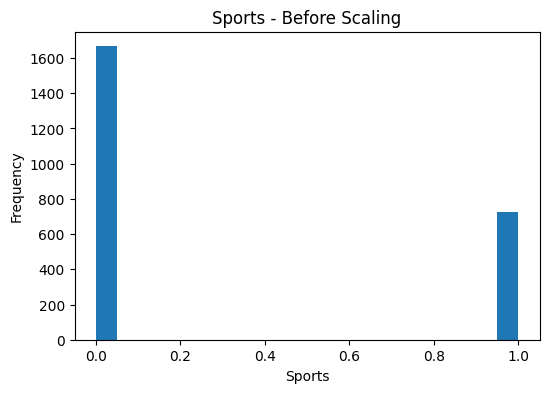

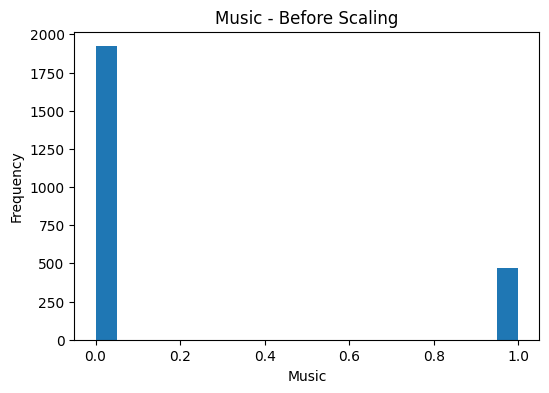

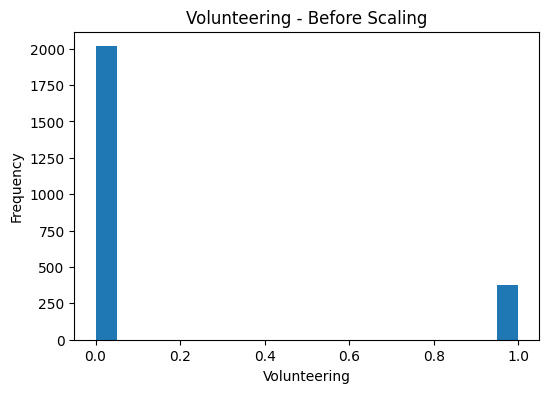

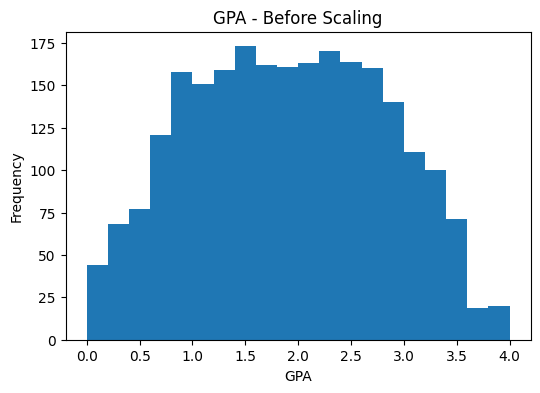

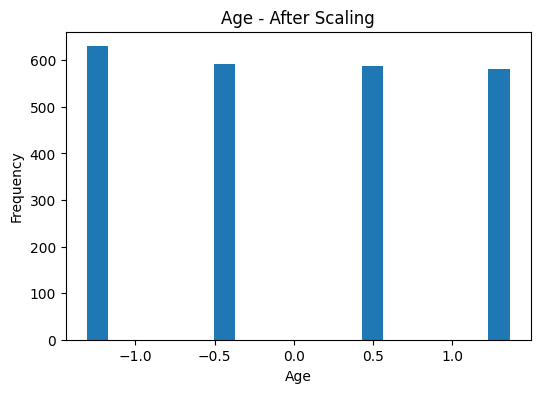

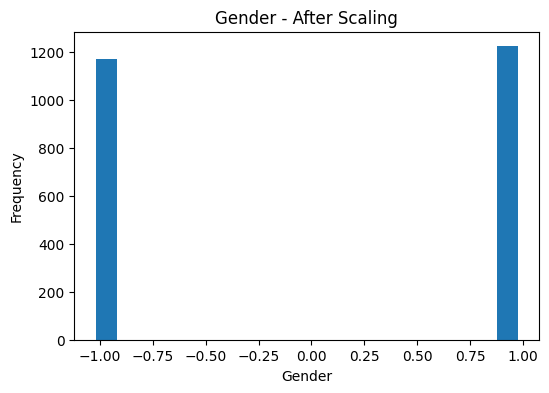

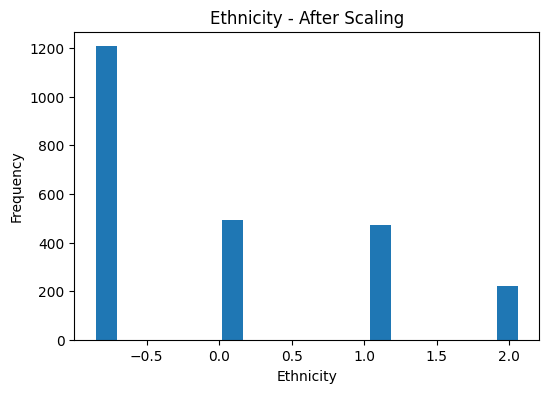

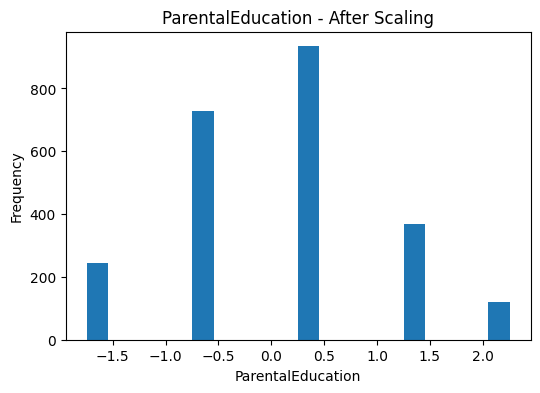

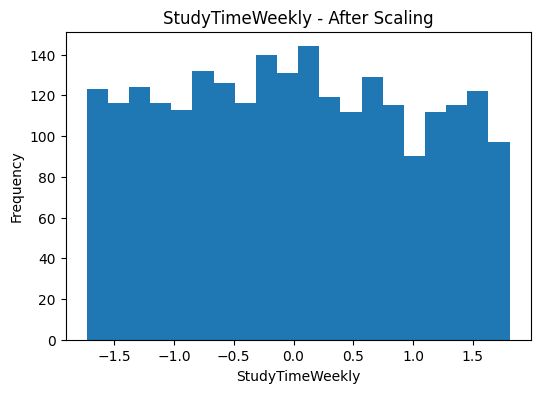

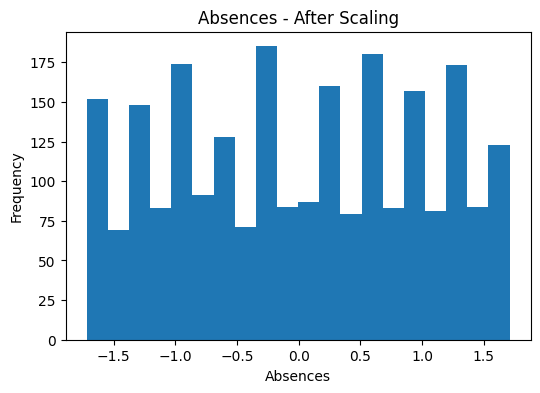

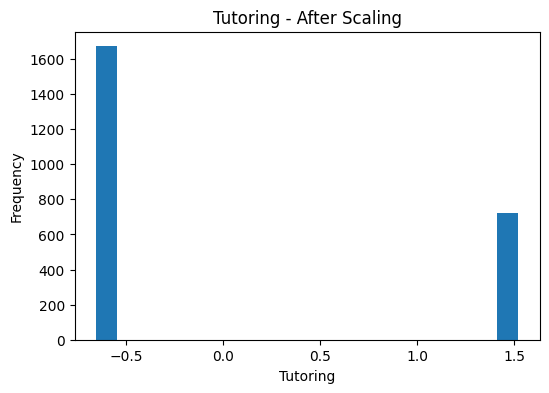

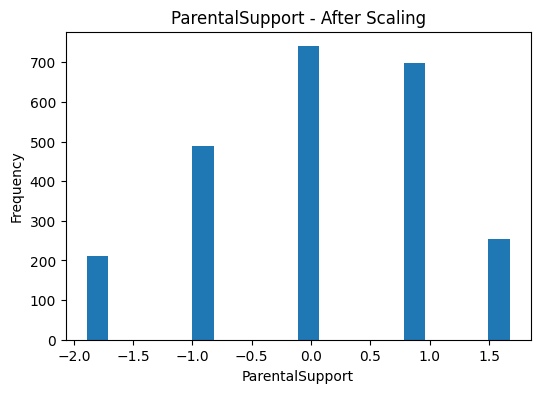

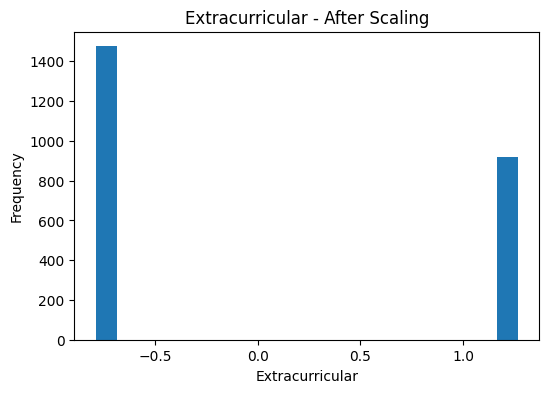

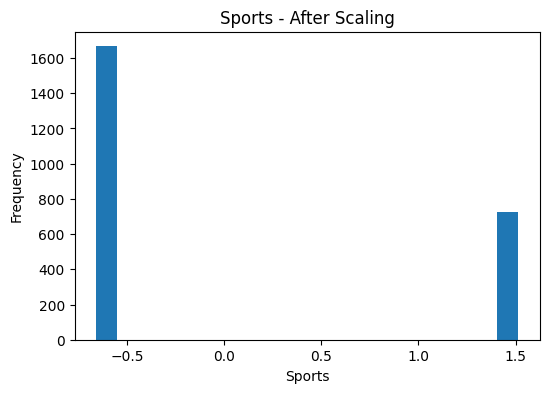

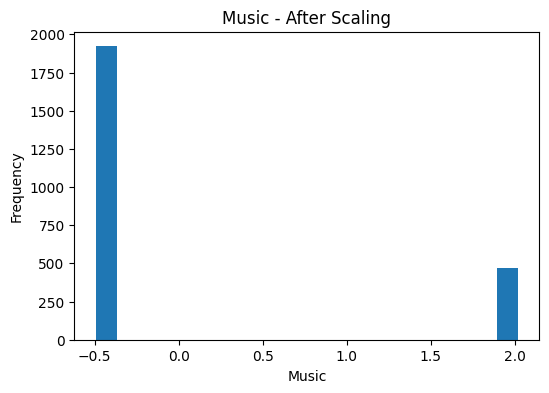

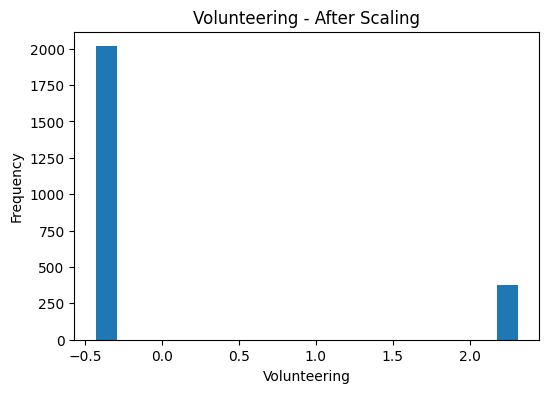

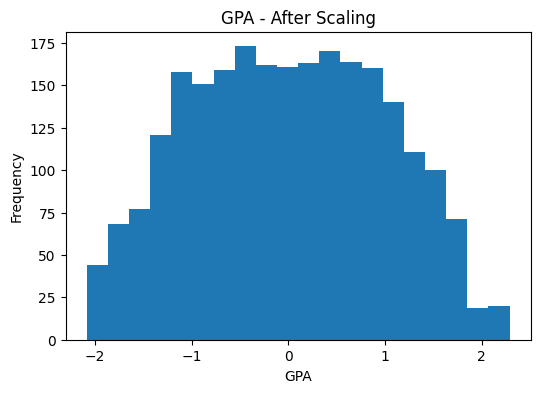


X_scaled shape: (2392, 13)
y shape: (2392,)


In [10]:


#  Checking for missing or duplicates
print("Missing:\n", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())

#  Droping StudentID because it's just an identifier
df = df.drop(columns=['StudentID'])

#  Target column
y = df['GradeClass'].astype(int)
X = df.drop(columns=['GradeClass'])

#  Plot before scaling
numeric_cols = X.columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    X[col].hist(bins=20)
    plt.title(f"{col} - Before Scaling")
    plt.grid(False)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#  Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#  Plot after scaling
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    X_scaled[col].hist(bins=20)
    plt.title(f"{col} - After Scaling")
    plt.grid(False)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Ready for model training
print("\nX_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)


 **Data Cleaning & Preparation Checklist**

-  **Missing values?** — None (`Missing: 0`)
-  **Duplicates?** — None (`Duplicates: 0`)
-  **Scaling?** — Numerical features scaled with `StandardScaler`
- **Features cleaned?** — Dropped `StudentID` and any unimportant columns
-  **Target prepared?** — `GradeClass` is an integer label (`0–4`)
-  **Features numeric?** — Yes — all numeric, perfect for scikit-learn
-  **Feature/target shapes?** — `X_scaled.shape: (2392, 13)` and `y.shape: (2392,)`


In [11]:
#Saving for the next notebook

X_scaled_df = pd.DataFrame(X_scaled, columns=X_scaled.columns)
X_scaled_df['GradeClass'] = y
X_scaled_df.to_csv('cleaned_student_data.csv', index=False)


In [12]:
%%writefile preprocessing.py

import pandas as pd
from sklearn.preprocessing import StandardScaler

def load_and_preprocess(filepath='cleaned_student_data.csv'):
    # Load the CSV
    df = pd.read_csv(filepath)
    # Separate features and target
    y = df['GradeClass'].astype(int)
    X = df.drop(columns=['GradeClass'], errors='ignore')
    return X, y


Writing preprocessing.py
